In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('car_data.csv')
df1

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df1.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [6]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df1['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [8]:
df1.drop('User ID',axis=1,inplace=True)

In [9]:
df1

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0
...,...,...,...,...
995,0,38,59000,0
996,1,47,23500,0
997,1,28,138500,1
998,1,48,134000,1


<AxesSubplot:ylabel='Purchased'>

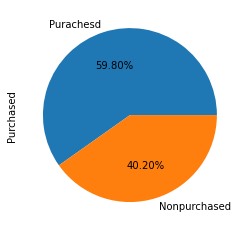

In [10]:
df1['Purchased'].value_counts().plot(kind='pie',labels=['Purachesd','Nonpurchased'],autopct='%1.2f%%')

In [11]:
x=df1.drop('Purchased',axis=1)
y=df1['Purchased']


<AxesSubplot:>

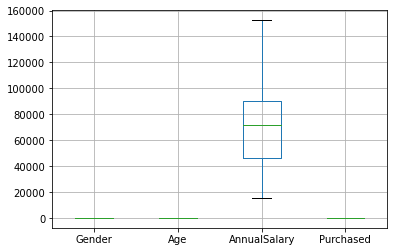

In [12]:
df1.boxplot()

In [13]:
std=StandardScaler()
x_scale=std.fit_transform(x)
x_df=pd.DataFrame(x_scale,columns=x.columns)
x_df

,Gender,Age,AnnualSalary
0,-1.032529,-0.477120,-1.528498
1,-1.032529,-0.009905,-0.846767
2,-1.032529,0.831082,0.038032
3,-1.032529,-0.009905,1.009861
4,-1.032529,-1.411549,0.183081
...,...,...,...
995,-1.032529,-0.196791,-0.397115
996,0.968496,0.644196,-1.426964
997,0.968496,-1.131220,1.909165
998,0.968496,0.737639,1.778621


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [15]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

accuracy_score 0.585
confusion matrix:
 [[101  19]
 [ 64  16]]
class report:
               precision    recall  f1-score   support

           0       0.61      0.84      0.71       120
           1       0.46      0.20      0.28        80

    accuracy                           0.58       200
   macro avg       0.53      0.52      0.49       200
weighted avg       0.55      0.58      0.54       200



<AxesSubplot:>

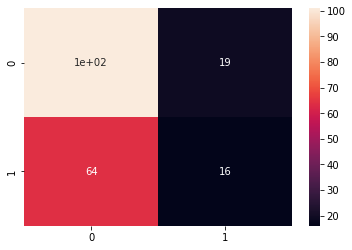

In [16]:
# test_data
y_pred=lr_model.predict(x_test)

acc_score1=accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score1)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_test,y_pred)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy_score 0.59
confusion matrix:
 [[400  78]
 [250  72]]
class report:
               precision    recall  f1-score   support

           0       0.62      0.84      0.71       478
           1       0.48      0.22      0.31       322

    accuracy                           0.59       800
   macro avg       0.55      0.53      0.51       800
weighted avg       0.56      0.59      0.55       800



<AxesSubplot:>

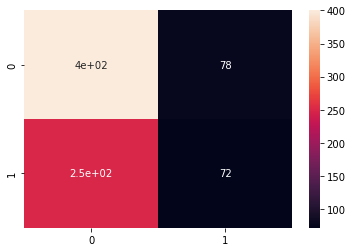

In [17]:
# train_data
y_pred_train=lr_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_score)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_train,y_pred_train)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

In [18]:
y_pred_proba=lr_model.predict_proba(x_test)
y_pred_proba[:5]

array([[0.52502062, 0.47497938],
       [0.52145615, 0.47854385],
       [0.49698106, 0.50301894],
       [0.52862283, 0.47137717],
       [0.54975677, 0.45024323]])

In [19]:
y_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [20]:
y_pred_proba[:,1]

array([0.47497938, 0.47854385, 0.50301894, 0.47137717, 0.45024323,
       0.48378903, 0.4802293 , 0.48750589, 0.47687786, 0.48218399,
       0.4736238 , 0.49010289, 0.45820188, 0.45932994, 0.49378234,
       0.48241728, 0.49153178, 0.4941193 , 0.49758004, 0.47931835,
       0.48462408, 0.49538905, 0.47266054, 0.47867384, 0.49148838,
       0.46135896, 0.48022535, 0.48573598, 0.48360145, 0.5016345 ,
       0.48506255, 0.49262537, 0.48843584, 0.51147564, 0.5036061 ,
       0.5010244 , 0.49175265, 0.49902444, 0.47557776, 0.51035694,
       0.47317446, 0.45715026, 0.4783146 , 0.45377235, 0.48310947,
       0.50374897, 0.48074155, 0.48535978, 0.48869854, 0.50150428,
       0.4600969 , 0.51552565, 0.48783244, 0.49716648, 0.50307259,
       0.48664767, 0.50706909, 0.45823481, 0.49143624, 0.46435272,
       0.48587238, 0.49222455, 0.45654084, 0.48124749, 0.46519221,
       0.46750301, 0.47171398, 0.47183506, 0.49028034, 0.44762041,
       0.47596989, 0.50730658, 0.48795623, 0.52590067, 0.48481

In [21]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,1])
thresh

array([1.52590067, 0.52590067, 0.51430414, 0.51358399, 0.5121682 ,
       0.51064651, 0.50929813, 0.50730658, 0.50706909, 0.50576775,
       0.50374897, 0.50307259, 0.50301894, 0.50287757, 0.5016345 ,
       0.5016306 , 0.50150428, 0.50124144, 0.5010244 , 0.50027929,
       0.50027144, 0.49919567, 0.49865339, 0.49815061, 0.4976795 ,
       0.49758004, 0.49716648, 0.49606781, 0.49499453, 0.4941193 ,
       0.49306415, 0.49262537, 0.49197053, 0.49010289, 0.48990008,
       0.48894861, 0.48869854, 0.48795623, 0.48793424, 0.48783244,
       0.48754291, 0.48750589, 0.48685281, 0.48664767, 0.48637478,
       0.4839381 , 0.48360145, 0.48277435, 0.48241728, 0.4822186 ,
       0.48218399, 0.4802293 , 0.47986213, 0.47867384, 0.47858958,
       0.47596989, 0.47590613, 0.47497938, 0.47488644, 0.47466368,
       0.4736238 , 0.4736073 , 0.47317446, 0.47132369, 0.4711302 ,
       0.47094066, 0.46962566, 0.46598481, 0.46457253, 0.46401893,
       0.46219622, 0.46135896, 0.45903443, 0.45823481, 0.45783

Text(0.5, 1.0, 'ROC CURVE')

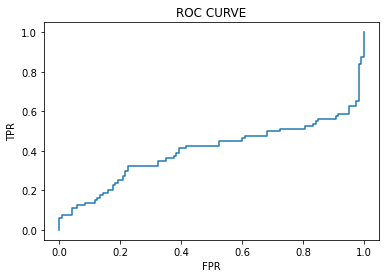

In [22]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [23]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
auc_score

0.40041666666666664

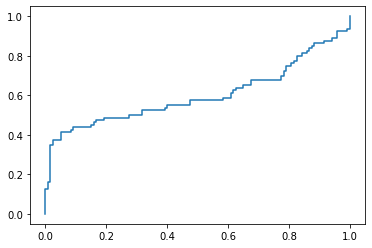

In [24]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_proba[:,0])
plt.plot(fpr,tpr)


In [25]:
auc_score=roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.5995833333333334

## AdaBoostClassifier

In [26]:
ab_model=AdaBoostClassifier(random_state=3)
ab_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=3)

accuracy_score 0.895
confusion matrix:
 [[106  14]
 [  7  73]]
class report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       120
           1       0.84      0.91      0.87        80

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



<AxesSubplot:>

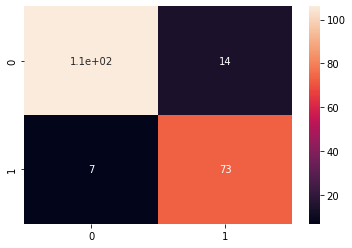

In [27]:
# test_data
y_pred=ab_model.predict(x_test)

acc_score2=accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score2)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_test,y_pred)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy_score 0.9
confusion matrix:
 [[442  36]
 [ 44 278]]
class report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       478
           1       0.89      0.86      0.87       322

    accuracy                           0.90       800
   macro avg       0.90      0.89      0.90       800
weighted avg       0.90      0.90      0.90       800



<AxesSubplot:>

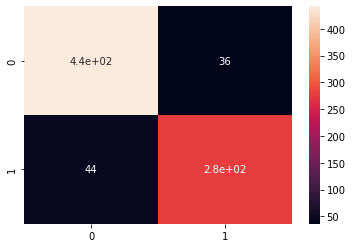

In [28]:
# train_data
y_pred_train=ab_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_score)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_train,y_pred_train)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

In [29]:
ab_model.feature_importances_

array([0.02, 0.26, 0.72])

<AxesSubplot:>

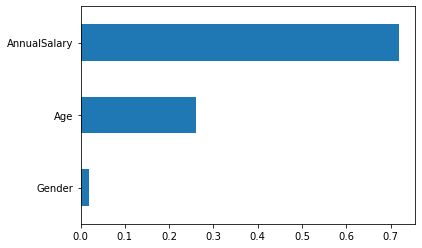

In [30]:
s1=pd.Series(ab_model.feature_importances_,index=x.columns)
s1.sort_values().plot(kind='barh')

## DecisionTreeClassifier

In [29]:
dt_model=DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

accuracy_score 0.89
confusion matrix:
 [[104  16]
 [  6  74]]
class report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.90       120
           1       0.82      0.93      0.87        80

    accuracy                           0.89       200
   macro avg       0.88      0.90      0.89       200
weighted avg       0.90      0.89      0.89       200



<AxesSubplot:>

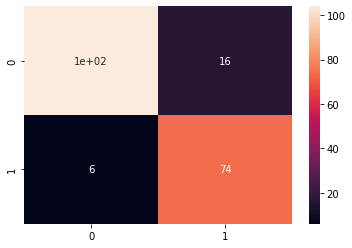

In [30]:
# test_data
y_pred=dt_model.predict(x_test)

acc_score3=accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score3)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_test,y_pred)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy_score 1.0
confusion matrix:
 [[478   0]
 [  0 322]]
class report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       322

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



<AxesSubplot:>

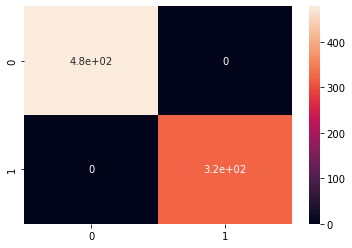

In [31]:
# train_data
y_pred_train=dt_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_score)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_train,y_pred_train)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

### hyper parameter tuning

In [32]:
dt_model=DecisionTreeClassifier(random_state=8)
hyp={ 'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(10,20),
    'min_samples_split':np.arange(5,25),
    'min_samples_leaf':np.arange(4,15),
    'max_features':np.arange(5,20),
    'random_state':np.arange(1,10)}
rscv_dt_model=RandomizedSearchCV(dt_model,hyp,cv=5)
rscv_dt_model.fit(x_train,y_train)
rscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=13,
                       min_samples_split=14, random_state=6, splitter='random')

In [34]:
dt_model=DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=13,
                       min_samples_split=14, random_state=6, splitter='random')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=13,
                       min_samples_split=14, random_state=6, splitter='random')

accuracy_score 0.885
confusion matrix:
 [[104  16]
 [  7  73]]
class report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       120
           1       0.82      0.91      0.86        80

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



<AxesSubplot:>

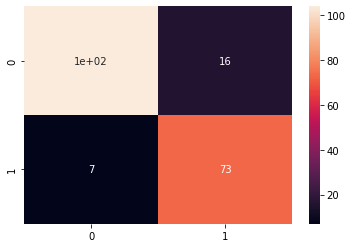

In [35]:
# test_data
y_pred=dt_model.predict(x_test)

acc_score_3=accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score_3)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_test,y_pred)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy_score 0.90375
confusion matrix:
 [[440  38]
 [ 39 283]]
class report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       478
           1       0.88      0.88      0.88       322

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



<AxesSubplot:>

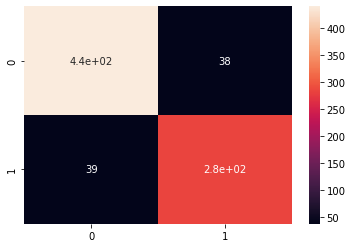

In [36]:
# train_data
y_pred_train=dt_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_score)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_train,y_pred_train)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

<AxesSubplot:>

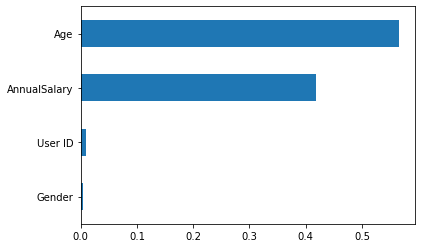

In [37]:
s2=pd.Series(dt_model.feature_importances_,index=x.columns)
s2.sort_values().plot(kind='barh')

# RandomForestClassfier

In [39]:
rf_model=RandomForestClassifier(random_state=12)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=12)

accuracy_score 0.91
confusion matrix:
 [[106  14]
 [  4  76]]
class report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       120
           1       0.84      0.95      0.89        80

    accuracy                           0.91       200
   macro avg       0.90      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



<AxesSubplot:>

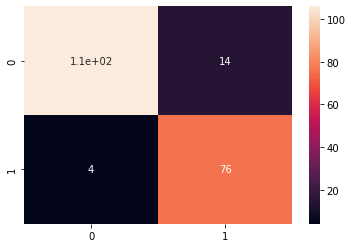

In [41]:
# test_data
y_pred=rf_model.predict(x_test)

acc_score4=accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score4)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_test,y_pred)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy_score 1.0
confusion matrix:
 [[478   0]
 [  0 322]]
class report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       322

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



<AxesSubplot:>

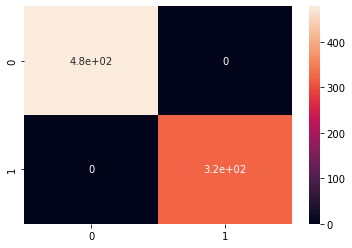

In [42]:
# train_data
y_pred_train=rf_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_score)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_train,y_pred_train)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

### hyper parameter tuning

In [44]:
rf_model=RandomForestClassifier(random_state=10)
hyp={'n_estimators':np.arange(10,150),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(3,12),
    'min_samples_split':np.arange(5,20),
    'min_samples_leaf':(5,15),
    'max_features':['sqrt','log2'],
    'random_state':np.arange(1,10)}
rscv_rf_model=RandomizedSearchCV(rf_model,hyp,cv=5)
rscv_rf_model.fit(x_train,y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=87, random_state=2)

In [46]:
rf_model=RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=87, random_state=2,oob_score=True)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=87, oob_score=True, random_state=2)

accuracy_score 0.895
confusion matrix:
 [[103  17]
 [  4  76]]
class report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       120
           1       0.82      0.95      0.88        80

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



<AxesSubplot:>

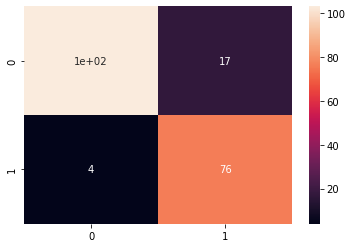

In [47]:
# test_data
y_pred=rf_model.predict(x_test)

acc_score_4=accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score_4)

cnf_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_test,y_pred)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

accuracy_score 0.94
confusion matrix:
 [[450  28]
 [ 20 302]]
class report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       478
           1       0.92      0.94      0.93       322

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



<AxesSubplot:>

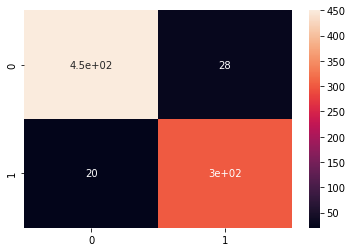

In [48]:
# train_data
y_pred_train=rf_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print('accuracy_score',acc_score)

cnf_mat=confusion_matrix(y_train,y_pred_train)
print('confusion matrix:\n',cnf_mat)

class_rep=classification_report(y_train,y_pred_train)
print('class report:\n',class_rep)

sns.heatmap(cnf_mat,annot=True)

<AxesSubplot:>

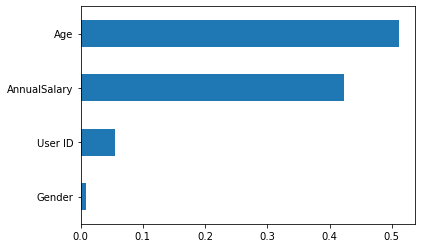

In [84]:
s3=pd.Series(rf_model.feature_importances_,index=x.columns)
s3.sort_values().plot(kind='barh')

In [53]:
models=pd.DataFrame({'model':['Logistic Regression','Adaboost Classifier',
                      'Random Forest Classifier','Dicision Tree Classifier'],
                    
                    'accuracy_score':[acc_score1,acc_score2,acc_score_4,acc_score_3]
                    })
models

,model,accuracy_score
0,Logistic Regression,0.590
1,Adaboost Classifier,0.910
2,Random Forest Classifier,0.895
3,Dicision Tree Classifier,0.885


In [60]:
px.bar(data_frame=models,x='model',y='accuracy_score',color='accuracy_score',
       template='plotly_dark',title='Model Comparison')

In [31]:
var=x.head(1)
var

,Gender,Age,AnnualSalary
0,0,35,20000


In [32]:
y.head(1)

0    0
Name: Purchased, dtype: int64

In [33]:
ab_model.predict(var)

array([0], dtype=int64)

In [34]:
#User ID = 385
Gender='male'
Age=40
AnnualSalary=107500


user_array=np.zeros(x.shape[1])
#user_array
#user2d_array=np.array(user_array,ndmin=2)

#user_array[0]=User ID

if Gender=='male':
    Gender_value=0
else:
    Gender_value=1 
user_array[0]=Gender_value

user_array[1]=Age
user_array[2]=AnnualSalary

user_array
user2d_array=np.array(user_array,ndmin=2)
print(user2d_array)
ab_model.predict(user2d_array)

[[0.000e+00 4.000e+01 1.075e+05]]


array([1], dtype=int64)

In [35]:
x.shape

(1000, 3)

In [36]:
project_data={'Gender':{'male':0,'female':1},
            'columns':list(x.columns)}
project_data

{'Gender': {'male': 0, 'female': 1},
 'columns': ['Gender', 'Age', 'AnnualSalary']}

In [39]:
import json
import pickle

In [40]:
with open('project_data.json','w') as file:
    json.dump(project_data,file)

In [43]:
with open('adaboost_model.pkl','wb') as file:
    pickle.dump(ab_model,file)